# 이해를 돕기 위해 Bias는 제외

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data Load

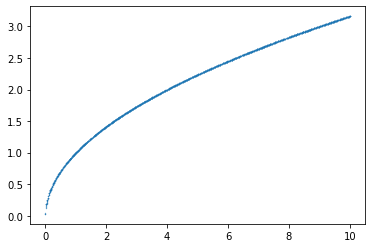

In [2]:
seed=123
np.random.seed(seed)
data=2400
X = np.random.rand(data)*10
Y=np.sqrt(X)
plt.scatter(X,Y,s=0.1)

# Sigmoid 정의

In [3]:
def Sigmoid(x):
    x=1/(1+np.exp(-x))
    return x

# 새로운 MLP 모델 정의

In [4]:
class Hypo():
    def __init__(self,w,b):
        self.w=w
        self.b=b
    def hypothesis(self,x):
        if self.b==False:
            f=self.w*x
            h=1/(1+np.exp(-f))
            return f,h
        else :
            return self.w*x+b

In [5]:
seed=123
np.random.seed(seed)
w1=np.random.rand(1)
w2=np.random.rand(1)
w3=np.random.rand(1)

# 1단계

In [6]:
b=False
hypo1=Hypo(w1,b)
hypo2=Hypo(w2,b)
hypo3=Hypo(w3,b)

# 2단계

In [7]:
f1,h1=hypo1.hypothesis(X[0])
f2,h2=hypo2.hypothesis(X[0])
f3,h3=hypo3.hypothesis(X[0])

# 3단계

In [8]:
pred_y=h1+h2+h3

In [9]:
pred_y

array([2.70148196])

# 새로운 Cost Function 정의

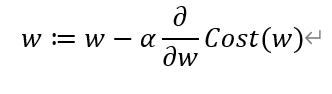

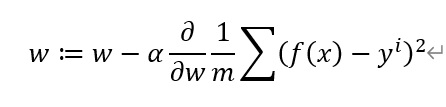

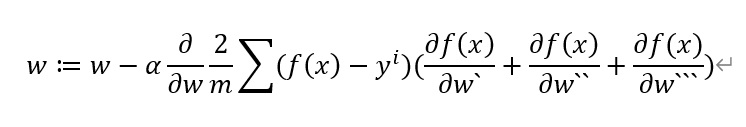

# 편미분 값

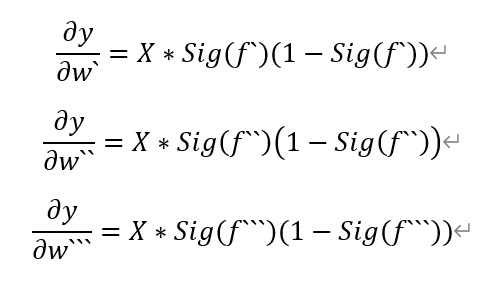

In [10]:
def Gradient_function(w1,w2,w3,X,Y):
    grad1=0
    grad2=0
    grad3=0
    cost=0
    b=False
    hypo1=Hypo(w1,b)
    hypo2=Hypo(w2,b)
    hypo3=Hypo(w3,b)
    for i in range(len(X)):
        f1,h1=hypo1.hypothesis(X[i])
        f2,h2=hypo2.hypothesis(X[i])
        f3,h3=hypo3.hypothesis(X[i])
        f_x=h1+h2+h3
        cost+=(f_x-Y[i])**2
        low1=X[i]*Sigmoid(f1)*(1-Sigmoid(f1))
        low2=X[i]*Sigmoid(f2)*(1-Sigmoid(f2))
        low3=X[i]*Sigmoid(f3)*(1-Sigmoid(f3))
        grad1+=2*(f_x-Y[i])*(low1)
        grad2+=2*(f_x-Y[i])*(low2)
        grad3+=2*(f_x-Y[i])*(low3)
        
    grad1=grad1/len(X)
    grad2=grad2/len(X)
    grad3=grad3/len(X)
    return grad1,grad2,grad3,cost

In [11]:
lr=1
list_grad1=[]
list_grad2=[]
list_grad3=[]
list_cost=[]

In [12]:
weight1=3
weight2=1
weight3=-1
for i in range(1000):
    grad1,grad2,grad3,cost=Gradient_function(weight1,weight2,weight3,X,Y)
    #print(grad1,grad2,grad3)
    weight1-=lr*grad1
    weight2-=lr*grad2
    weight3-=lr*grad3
    #print(weight1,weight2,weight3)
    list_grad1.append(weight1)
    list_grad2.append(weight2)
    list_grad3.append(weight3)
    list_cost.append(cost)

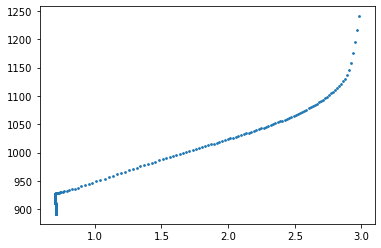

In [13]:
plt.scatter(list_grad1,list_cost,s=3)

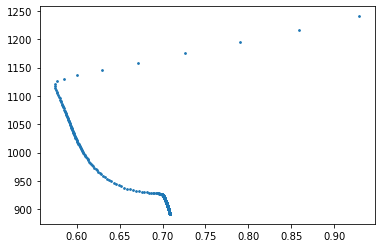

In [14]:
plt.scatter(list_grad2,list_cost,s=3)

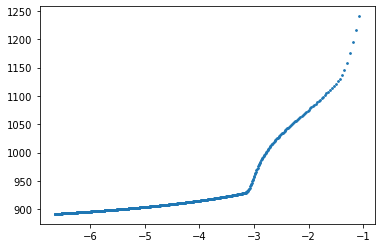

In [15]:
plt.scatter(list_grad3,list_cost,s=3)

In [16]:
weight1,weight2,weight3

(0.7084842376522117, 0.7084842376522117, -6.646773360249972)

In [17]:
final_hypo1=Hypo(weight1,b)
final_hypo2=Hypo(weight2,b)
final_hypo3=Hypo(weight3,b)
final_out=[]
for i in range(len(X)):
    final_f1,final_h1=final_hypo1.hypothesis(X[i])
    final_f2,final_h2=final_hypo2.hypothesis(X[i])
    final_f3,final_h3=final_hypo3.hypothesis(X[i])
    final_f_x=final_h1+final_h2+final_h3
    final_out.append(final_f_x)

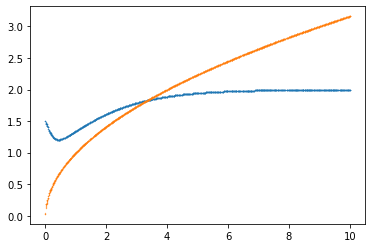

In [18]:
plt.scatter(X,final_out,s=0.1)
plt.scatter(X,Y,s=0.1)

# 문제 : Local Minimum에 빠지고 모델의 파라메타 추가의 필요성이 보인다.
# 결론 : 좀더 복잡한 모델, Optimizer가 필요하다.